# Task 2 - Landsat 8 false color image

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/rosemaryjuarez/220-hw-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a false color image showing the fire scar of the Thomas fire in 2017. 
Read more about false color images here:
[NASA Earth Observatory - Why is that Forest Red and that Cloud Blue?
How to Interpret a False-Color Satellite Image](https://earthobservatory.nasa.gov/features/FalseColor)

## About the data

In this task you will use two datsets:

**First dataset**

A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. 

Information about Landsat bands from USGS:

- [What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

-[Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

-[How do I use a scale factor with Landsat Level-2 science products?](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products)


The data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). Data should be used for visualization purposes only. 


**Second dataset**

A shapefile of fire perimeters in California during 2017. 
The [complete file can be accessed in the CA state geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about).

## File management
All your data files must be  inside a directory named 'data' **in your gitignore**. 

## Data access
All data is in the Canvas-week7-homework zip file.

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(121170.0, 356070.0, 3755160.0, 3952530.0)

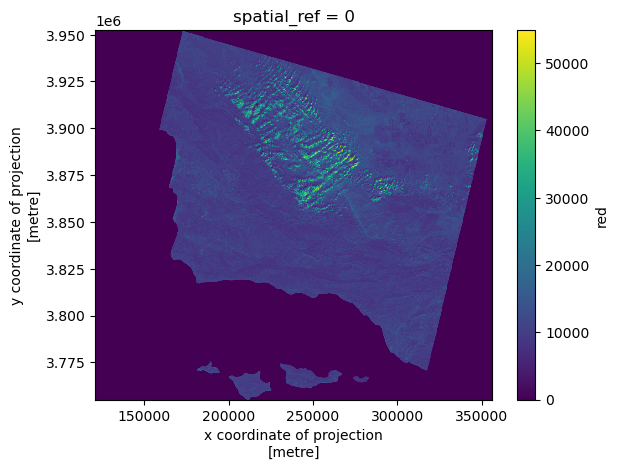

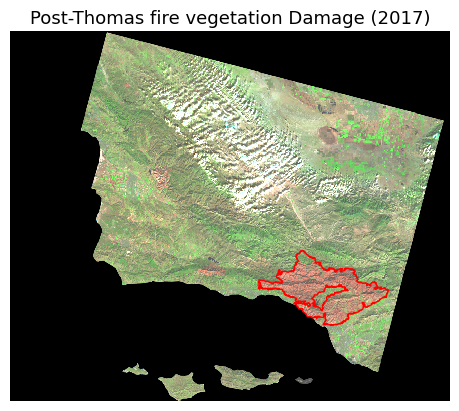

In [28]:
### ===== FINAL CODE =====
# import libraries and functions here
import os
import numpy as np
import matplotlib.pyplot as plt

import rioxarray as rioxr

import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.geometry import box

# currently importing landsat data, and assigning the variable landsat.
path = os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc')
landsat = rioxr.open_rasterio(path)

# checking to make sure that everything looks good
landsat

#reading in the california fire perimeter for this
ca = gpd.read_file('data/ca_fire_perimeter/California_Fire_Perimeters_2017.shp')
#checking to see what i am dealing with 
ca.head()

#just plotting the red band to check and see if i read it in correctly
landsat['red'].plot()

# and here i am just squeezing and dropping unneccesary data information, such as the band coordinates
landsat = landsat.squeeze()
landsat = landsat.drop('band')
landsat

# here i am plotting for true color imagery for the first time
landsat[['red', 'green', 'blue']].to_array().plot.imshow()
#seems like i need to change and update some issues

# i am using the robust parameter to remove any extreme values or outliers
#focusing from between the 2nd-98th percentile
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)
#true color works now!

# using false color imagery to highlight vegetation.
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)

#checking my column names to highlight thomas fire
ca.head()

#now im filtering for thomas fire

thomas = ca[ca.FIRE_NAME == 'THOMAS']

#changing the crs to landsat so that it aligns well
thomas = thomas.to_crs(landsat.rio.crs)

# Customizing my map now to highlight thomas fire and the vegetation
fig, ax = plt.subplots()

landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)
thomas.plot(ax = ax,
           edgecolor = 'red',
           facecolor = 'none')
ax.set_title('Post-Thomas fire vegetation Damage (2017)',  fontsize=13)
ax.axis('off')
#done!

## Import libraries and functions

In [ ]:
# import libraries and functions here
import os
import numpy as np
import matplotlib.pyplot as plt

import rioxarray as rioxr

import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.geometry import box

## Import data

In [ ]:
# currently importing landsat data, and assigning the variable landsat.
path = os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc')
landsat = rioxr.open_rasterio(path)

## Exploration 

Use the next cell(s) to perform relevant explorations of these datasets.

In [ ]:
# checking to make sure that everything looks good
landsat

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [ ]:
#reading in the california fire perimeter for this
ca = gpd.read_file('data/ca_fire_perimeter/California_Fire_Perimeters_2017.shp')
#checking to see what i am dealing with 
ca.head()

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,...,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,...,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."
2,19838,41431,2017,CA,CCO,VNC,GRADE,00054660,2017-07-04,2017-07-05,...,47.194027,None,None,None,None,None,2010,2587.259697,279911.825212,"POLYGON ((-13244637.580 4056332.530, -13244620..."
3,19839,41432,2017,CA,CCO,VNC,PACIFICA,00051791,2017-06-24,2017-06-24,...,1.158548,GPS track,None,None,None,None,2010,501.178102,6859.664843,"POLYGON ((-13229521.754 4046254.111, -13229510..."
4,19840,41433,2017,CA,CCO,VNC,MONTVIEW,00040196,2017-05-15,2017-05-15,...,2.893327,Rough per description. waiting for walked GPS...,None,None,None,None,2010,484.388887,17133.006159,"POLYGON ((-13229663.036 4046858.853, -13229667..."


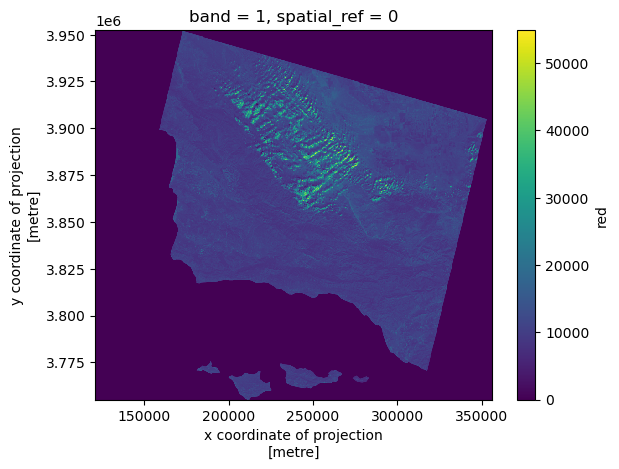

In [ ]:
#just plotting the red band to check and see if i read it in correctly
landsat['red'].plot()

## Updates

If there are any updates needed to the data to plot the true and false color images, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [ ]:
# and here i am just squeezing and dropping unneccesary data information, such as the band coordinates
landsat = landsat.squeeze()
landsat = landsat.drop('band')
landsat

<xarray.Dataset>
Dimensions:      (y: 731, x: 870)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0
Data variables:
    red          (y, x) float64 ...
    green        (y, x) float64 ...
    blue         (y, x) float64 ...
    nir08        (y, x) float64 ...
    swir22       (y, x) float64 ...

## True color image

Without creating any new variables:

Select the red, green and blue variables (in that order) of the `xarray.Dataset`, convert it to a `numpy.array` using the `to_array()` method, and then use `.plot.imshow()` to create an RGB image with the data. (There will be a warning)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


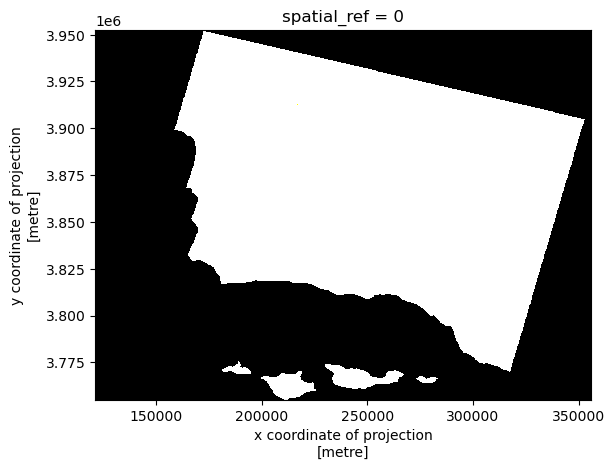

In [ ]:
# here i am plotting for true color imagery for the first time
landsat[['red', 'green', 'blue']].to_array().plot.imshow()
#seems like i need to change and update some issues

Adjust the scale used for plotting the bands to get a true color image. 
HINT: [Check the `robust` parameter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting. 

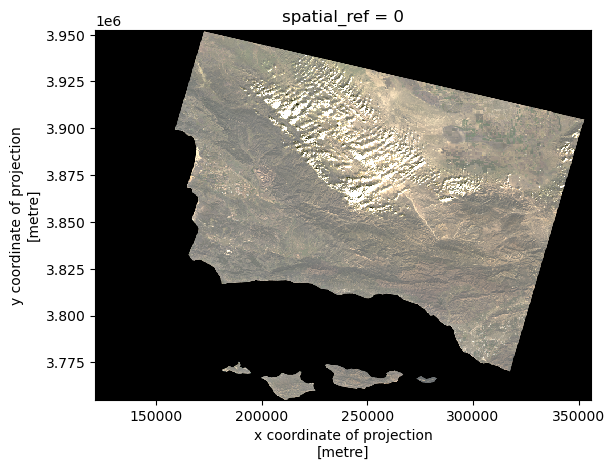

In [ ]:
# i am using the robust parameter to remove any extreme values or outliers
#focusing from between the 2nd-98th percentile
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)
#true color works now!

## False color image
Without creating any new variables:

Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

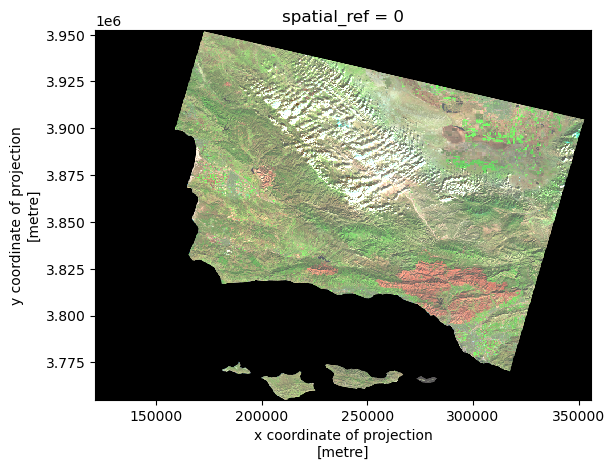

In [ ]:
# using false color imagery to highlight vegetation.
false = landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)

## Updates

If there are any updates needed to the data to create the map, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [ ]:
#checking my column names to highlight thomas fire
ca.head()

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,...,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,...,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."
2,19838,41431,2017,CA,CCO,VNC,GRADE,00054660,2017-07-04,2017-07-05,...,47.194027,None,None,None,None,None,2010,2587.259697,279911.825212,"POLYGON ((-13244637.580 4056332.530, -13244620..."
3,19839,41432,2017,CA,CCO,VNC,PACIFICA,00051791,2017-06-24,2017-06-24,...,1.158548,GPS track,None,None,None,None,2010,501.178102,6859.664843,"POLYGON ((-13229521.754 4046254.111, -13229510..."
4,19840,41433,2017,CA,CCO,VNC,MONTVIEW,00040196,2017-05-15,2017-05-15,...,2.893327,Rough per description. waiting for walked GPS...,None,None,None,None,2010,484.388887,17133.006159,"POLYGON ((-13229663.036 4046858.853, -13229667..."


In [ ]:
#now im filtering for thomas fire

thomas = ca[ca.FIRE_NAME == 'THOMAS']

In [ ]:
#changing the crs to landsat so that it aligns well
thomas = thomas.to_crs(landsat.rio.crs)

## Map

Create a map showing the shortwave infrared/nir/ ed false color image together with the Thomas fire perimeter. 
Customize it appropriately.

(121170.0, 356070.0, 3755160.0, 3952530.0)

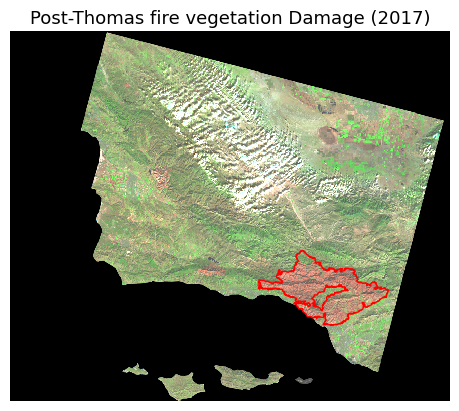

In [29]:
# Customizing my map now to highlight thomas fire and the vegetation
fig, ax = plt.subplots()

landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)
thomas.plot(ax = ax,
           edgecolor = 'red',
           facecolor = 'none')
ax.set_title('Post-Thomas fire vegetation Damage (2017)',  fontsize=13)
ax.axis('off')

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the plot you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.